<a href="https://colab.research.google.com/github/dustinober1/Detecting-Credit-Card-Fraud/blob/main/Detecting_Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Credit Card Fraud

In [2]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


These lines of code will print True if there are any NaN values, if not all the values are finite, or if any of the values are too large for float64.

In [5]:
import numpy as np
print(np.any(np.isnan(df)))
print(np.all(np.isfinite(df)))
print(np.all(np.abs(df) < np.finfo(np.float64).max))

False
True
True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

This will replace all the NaN values in the DataFrame df with 0.0.

The fillna() method takes the value argument, which specifies the value to use for filling the NaN values. In this case, we set it to 0.0. The inplace=True argument ensures that the changes are made to the original DataFrame df in place, rather than creating a new DataFrame.

Note that replacing missing values with a constant value such as 0.0 is just one of several possible strategies for handling missing data. You may want to explore other strategies, such as imputation or deletion, depending on the nature of your data and the problem you are trying to solve.

In [6]:
df.fillna(value=0.0, inplace=True)

This code imports the train_test_split function from the model_selection module of the Scikit-learn library. The purpose of this function is to split a dataset into training and testing subsets, which are used for model training and evaluation, respectively.

The code then assumes that the dataset is stored in a Pandas DataFrame named df. It creates a new DataFrame x by dropping the Time and Class columns from df. The x DataFrame contains the features (input variables) for the model. The code also creates a Series y by selecting the Class column from df. The y Series contains the target variable for the model.

The train_test_split function is then called with the following arguments:

- x and y are the feature and target variables, respectively.
test_size is set to 0.2, which means that 20% of the dataset will be used for testing, and 80% for training.
- stratify is set to y, which means that the splitting is done in a way that preserves the proportion of the target variable in each subset. This is useful if the target variable is imbalanced, meaning that there are more examples of one class than the others.
- random_state is set to 0, which means that the splitting is done in a reproducible way, so that the same random splitting will be applied each time the code is run.

Finally, the function returns four objects: x_train, x_test, y_train, and y_test, which are the training and testing subsets of the feature and target variables, respectively. These subsets can be used for training and evaluating a machine learning model.

In [7]:
from sklearn.model_selection import train_test_split

x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

This code imports the LogisticRegression class from the linear_model module of the Scikit-learn library, and creates a new instance of this class called lr_model. The LogisticRegression class is used to implement logistic regression, which is a popular classification algorithm in machine learning.

The LogisticRegression constructor takes several optional parameters, which are used to configure the behavior of the model. In this case, two parameters are used:

- random_state: This parameter is used to ensure that the results of the model are reproducible across different runs. It sets the seed for the random number generator used by the model.
- max_iter: This parameter is used to set the maximum number of iterations that the solver should run. The solver is used to optimize the model parameters to fit the training data. Setting a higher value for max_iter can increase the accuracy of the model, but it also increases the training time.

After creating the lr_model instance, the code calls the fit() method of the model to train the model on the training data. The fit() method takes two arguments:

- x_train: This is the feature matrix (input data) for the training set.
- y_train: This is the target vector (output data) for the training set.

During training, the logistic regression algorithm learns the relationship between the input features and the output target, and finds the optimal values of the model parameters to minimize the error between the predicted output and the actual output on the training set.

Once the model is trained, you can use it to make predictions on new data using the predict() method of the model.

In [8]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, max_iter=5000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=5000, random_state=0)

This code imports the ConfusionMatrixDisplay class from the sklearn.metrics module of the Scikit-learn library, and creates a new instance of this class called cmd. The ConfusionMatrixDisplay class is used to generate and display a confusion matrix, which is a table that summarizes the performance of a classification model.

The from_estimator() method of the ConfusionMatrixDisplay class is then called to generate the confusion matrix for the logistic regression model (lr_model) on the test set (x_test and y_test). The from_estimator() method takes several arguments:

- estimator: This is the trained machine learning model (lr_model in this case) that will be evaluated using the test set.
- X: This is the feature matrix (input data) for the test set.
- y_true: This is the target vector (output data) for the test set.
display_labels: This is a list of labels to use for the rows and columns of the confusion matrix. In this case, the labels are set to ['Legitimate', 'Fraudulent'].
- cmap: This parameter specifies the color map to use for the display. In this case, the color map is set to 'Blues'.
- xticks_rotation: This parameter specifies the rotation angle of the x-axis tick labels. In this case, the tick labels are rotated vertically for better visibility.

Once the confusion matrix is generated, the cmd instance can be displayed using the plot() method. For example, you can run:

This will display the confusion matrix for the logistic regression model. The confusion matrix displays the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for the model on the test set. The TP and TN values represent the number of correct predictions, while the FP and FN values represent the number of incorrect predictions.

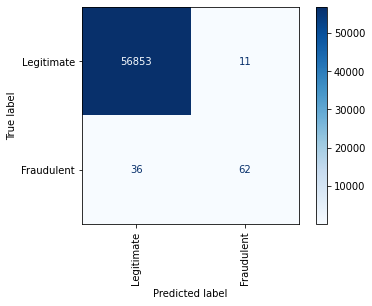

In [9]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

labels = ['Legitimate', 'Fraudulent']
cmd.from_estimator(lr_model, x_test, y_test, display_labels=labels,
                   cmap='Blues', xticks_rotation='vertical')

This code imports the RandomForestClassifier class from the ensemble module of the Scikit-learn library, and creates a new instance of this class called rf_model. The RandomForestClassifier class is used to implement a random forest algorithm, which is an ensemble learning method for classification tasks.

The RandomForestClassifier constructor takes several optional parameters, which are used to configure the behavior of the model. In this case, one parameter is used:

- random_state: This parameter is used to ensure that the results of the model are reproducible across different runs. It sets the seed for the random number generator used by the model.

After creating the rf_model instance, the code calls the fit() method of the model to train the model on the training data. The fit() method takes two arguments:

- x_train: This is the feature matrix (input data) for the training set.
- y_train: This is the target vector (output data) for the training set.

During training, the random forest algorithm builds a collection of decision trees based on random subsets of the input features and data points. The algorithm then aggregates the output of these individual trees to produce a final prediction for a given input.

Once the model is trained, the code generates a confusion matrix for the model using the from_estimator() method of the ConfusionMatrixDisplay class, which is similar to what was done for the logistic regression model. The from_estimator() method takes the same arguments as before, but this time it takes the trained random forest model (rf_model) as the first argument instead of the logistic regression model.

After generating the confusion matrix using cmd.from_estimator(), the confusion matrix can be displayed using the plot() method of the cmd instance.

Note that because the random forest algorithm is a more complex model than logistic regression, it may take longer to train and may require more resources to run. However, it can often achieve higher accuracy on complex classification tasks.

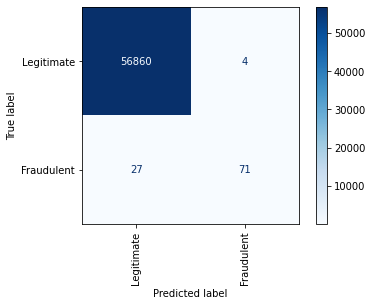

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

cmd.from_estimator(rf_model, x_test, y_test, display_labels=labels,
                   cmap='Blues', xticks_rotation='vertical')

This code imports the GradientBoostingClassifier class from the ensemble module of the Scikit-learn library, and creates a new instance of this class called gbm_model. The GradientBoostingClassifier class is used to implement a gradient boosting algorithm, which is another ensemble learning method for classification tasks.

The GradientBoostingClassifier constructor takes several optional parameters, which are used to configure the behavior of the model. In this case, one parameter is used:

- random_state: This parameter is used to ensure that the results of the model are reproducible across different runs. It sets the seed for the random number generator used by the model.

After creating the gbm_model instance, the code calls the fit() method of the model to train the model on the training data. The fit() method takes two arguments:

- x_train: This is the feature matrix (input data) for the training set.
- y_train: This is the target vector (output data) for the training set.

During training, the gradient boosting algorithm builds an ensemble of decision trees sequentially, with each tree built to correct the errors of the previous tree. The algorithm uses gradient descent to minimize a loss function that measures the difference between the model's predictions and the actual targets.

Once the model is trained, the code generates a confusion matrix for the model using the from_estimator() method of the ConfusionMatrixDisplay class, which is similar to what was done for the logistic regression and random forest models. The from_estimator() method takes the same arguments as before, but this time it takes the trained gradient boosting model (gbm_model) as the first argument instead of the logistic regression or random forest model.

After generating the confusion matrix using cmd.from_estimator(), the confusion matrix can be displayed using the plot() method of the cmd instance.

Note that because the gradient boosting algorithm is also a complex model, it may take longer to train and may require more resources to run. However, it can often achieve higher accuracy on complex classification tasks than simpler models like logistic regression.

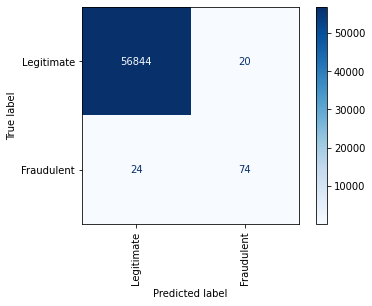

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=0)
gbm_model.fit(x_train, y_train)

cmd.from_estimator(gbm_model, x_test, y_test, display_labels=labels,
                   cmap='Blues', xticks_rotation='vertical')

This code computes several evaluation metrics for the random forest classifier that was trained and tested earlier.

After training the random forest classifier rf_model and predicting the labels of the test set, the code uses the precision_score and recall_score functions from Scikit-learn to compute the precision and recall of the classifier. These are two commonly used evaluation metrics for binary classification tasks.

- Precision measures the proportion of true positive predictions among all positive predictions, and is given by: TP / (TP + FP), where TP is the number of true positives (fraudulent transactions correctly predicted as fraudulent) and FP is the number of false positives (legitimate transactions incorrectly predicted as fraudulent). High precision indicates that the classifier produces few false positive predictions.
- Recall (also known as sensitivity) measures the proportion of true positive predictions among all actual positive cases, and is given by: TP / (TP + FN), where FN is the number of false negatives (fraudulent transactions incorrectly predicted as legitimate). High recall indicates that the classifier produces few false negative predictions.

The code also computes the specificity, which is the proportion of true negative predictions among all actual negative cases. Specifically, it uses the recall_score function with the pos_label=0 argument to compute the recall of the negative class (legitimate transactions) and interprets it as the specificity. The formula for specificity is: TN / (TN + FP), where TN is the number of true negatives (legitimate transactions correctly predicted as legitimate) and FP is the number of false positives.

Finally, the code prints out the computed values of precision, recall, sensitivity, and specificity using f-strings to format the output.

In [12]:
from sklearn.metrics import precision_score, recall_score

y_pred = rf_model.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall
specificity = recall_score(y_test, y_pred, pos_label=0)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Precision: 0.9466666666666667
Recall: 0.7244897959183674
Sensitivity: 0.7244897959183674
Specificity: 0.9999296567248172
